![](http://scikit-learn.org/stable/_images/sphx_glr_plot_partial_dependence_002.png)

## 目录

- 问题描述-使用复杂的机器学习或深度学习算法时，我们如何更好地理解输入和输出之间的因果关系？
- 特征重要性-什么是重要性？ 我们如何测量？
- 线性模型
- 机器学习算法
- 集成学习
- 神经网络
- 部分依赖图：i 线性模型 ii.机器学习算法 iii.ensenmble iv.神经网络
- 案例研究-糖尿病危险因素


## 在实际应用中，使用ML算法的问题
A. 机器学习算法很难向内部客户解释。 “梯度提升是什么？???我明白了。您使用了AI，对吗？”

B.许多业务问题需要对模型结果进行解释（特别是当答案与CEO想要的相反时）。商业分析中的一些示例包括：

- 新客户收购的主要驱动因素是什么？
- 哪些营销促销正在推动业务绩效？
- 是否有各种促销渠道可以最大化我的促销支出回报？
- 我应该在每个促销渠道上花费多少；即什么是媒体组合？
- 为什么预测比去年低20％？
- 我该怎么做才能使其比去年提高20％？这是首席执行官的任务。

C. ML算法中“原因”和“效果”之间的联系可能很复杂，也无法通过分析确定。例如，使用多层神经网络的梯度或计算来自集成学习算法的输入的各自效应。

## 特征重要性

在机器学习中，功能重要性是理解输入的相对性能的一种方法。 关于如何在机器学习中确定特征重要性的简单解释是，检查每个输入都发生变化时样本预测精度的变化。

下面提供了一些使用来自UCI ML的Pima Indians糖尿病的基本示例。

Index(['preg', 'gluc', 'dbp', 'skin', 'insul', 'bmi', 'pedi', 'age', 'class'], dtype='object')
Accuracy on training set: 1.000
Accuracy on test set: 0.714
Accuracy on training set: 0.773
Accuracy on test set: 0.740

Decision Tree Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


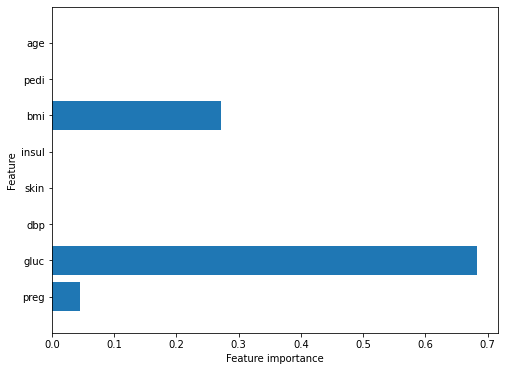

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

#diabetes = pd.read_csv('pima-indians-diabetes.csv')
filename = 'data/pima-indians-diabetes.csv'
names = ['preg', 'gluc', 'dbp', 'skin', 'insul', 'bmi', 'pedi', 'age', 'class']
diabetes = pd.read_csv(filename, names=names)

print(diabetes.columns)
diabetes.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'class'], diabetes['class'], stratify=diabetes['class'], random_state=66)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

print("")
print("Decision Tree Feature importances:\n{}".format(tree.feature_importances_))

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('Decision Tree feature_importance')


Random Forest
Accuracy on training set: 1.000
Accuracy on test set: 0.786

Random Forest - Max Depth = 3
Accuracy on training set: 0.800
Accuracy on test set: 0.755

Random Forest Feature Importance


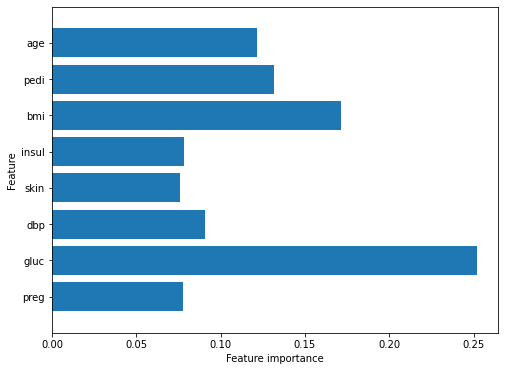

In [5]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("")
print('Random Forest')
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("")
print('Random Forest - Max Depth = 3')
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

print("")
print('Random Forest Feature Importance')
plot_feature_importances_diabetes(rf)

## Partial Dependence Plots

为了确定GBM算法中各个风险因素的影响，模型预测会在输入域上绘制图表，同时平均其他模型预测变量。 该图称为偏相关图。

scikit-learn的示例程序使用部分依赖图改编了用于部分依赖图的python代码。

改编自Kaggle上“ DanB”的示例显示了一个使用Melbourne Housing Data的简单示例。

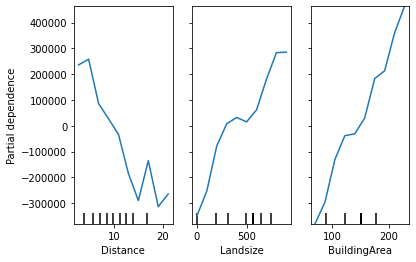

In [9]:
# Partial Dependence Plots - adapted from Dan B NB on Kaggle()
import pandas as pd
from pandas import read_csv, DataFrame
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

def get_some_data():
    cols_to_use = ['Distance', 'Landsize', 'BuildingArea']
#     https://www.kaggle.com/gunjanpathak/melb-data
    data = pd.read_csv('data/melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = SimpleImputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

from sklearn.inspection import partial_dependence, plot_partial_dependence

# get_some_data is defined in hidden cell above.
X, y = get_some_data()
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 1, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

## 实例：用于识别糖尿病前危险因素的部分依赖图

Automatically created module for IPython interactive environment
   preg   gluc   dbp       skin       insul   bmi   pedi   age  class
0   6.0  148.0  72.0  35.000000  165.475260  33.6  0.627  50.0    1.0
1   1.0   85.0  66.0  29.000000   62.304286  26.6  0.351  31.0    0.0
2   8.0  183.0  64.0  20.078082  210.991380  23.3  0.672  32.0    1.0
3   1.0   89.0  66.0  23.000000   94.000000  28.1  0.167  21.0    0.0
4   0.0  137.0  40.0  35.000000  168.000000  43.1  2.288  33.0    1.0
(768, 8)
Training GBRT...
 done.
done in 0.128s
[0.0544944  0.23726041 0.04045046 0.04838732 0.23154373 0.15424069
 0.12426746 0.10935554]


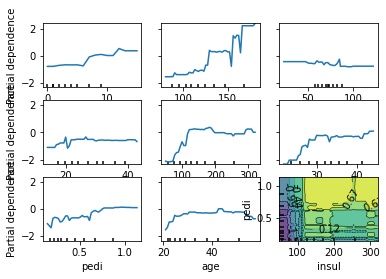

In [20]:
from __future__ import print_function
print(__doc__)
from pandas import read_csv, DataFrame
import numpy as np
filename = "data/ln_skin_ln_insulin_imp_data.csv"
names = ['preg', 'gluc', 'dbp', 'skin', 'insul', 'bmi', 'pedi', 'age', 'class']
dataset = read_csv(filename, names=names)
# Compute ratio of insulin to glucose 
#dataset['ratio'] = dataset['insul']/dataset['gluc']



import numpy as np
import matplotlib.pyplot as plt

from time import time

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import partial_dependence, plot_partial_dependence
from joblib import dump
from joblib import load

# split dataset into inputs and outputs
print(dataset.head())

values = dataset.values
X = values[:,0:8]
print(X.shape)
y = values[:,8]
#print(y.shape)

#def main():

    # split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)
names = ['preg', 'gluc', 'dbp', 'skin', 'insul', 'bmi', 'pedi', 'age']

print("Training GBRT...")
model = GradientBoostingClassifier(n_estimators=100, max_depth=4,learning_rate=0.1, loss='deviance',random_state=1)
t0 = time()
model.fit(X_train, y_train)
print(" done.")
    
print("done in %0.3fs" % (time() - t0))
importances = model.feature_importances_
    
print(importances)

#print('Convenience plot with ``partial_dependence_plots``')

features = [0, 1, 2, 3, 4, 5, 6, 7, (4,6)]
display = plot_partial_dependence(model, X_train, features,feature_names=names,n_jobs=3, grid_resolution=50)


In [23]:
features

[0, 1, 2, 3, 4, 5, 6, 7, (4, 6)]

Custom 3d plot via ``partial_dependence``


<Figure size 432x288 with 0 Axes>

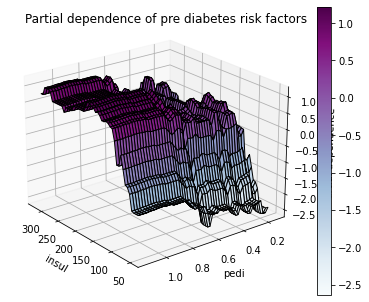

GradientBoostingClassifier(max_depth=4, random_state=1)


TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

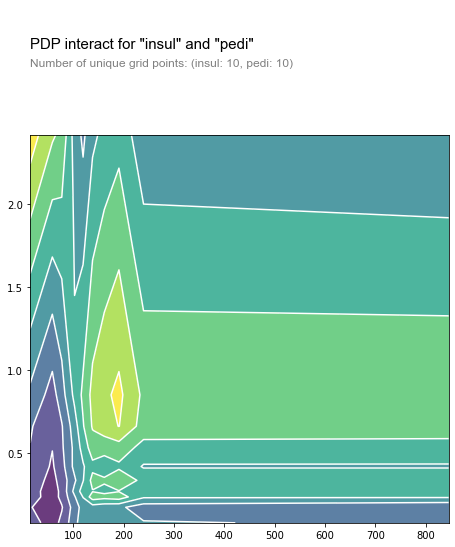

In [43]:
#fig.suptitle('Partial dependence plots of pre diabetes on risk factors')
            
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4)  # tight_layout causes overlap with suptitle

    
print('Custom 3d plot via ``partial_dependence``')
fig = plt.figure()

target_feature = (4, 6)
pdp, axes = partial_dependence(model, features=target_feature,X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=142)
plt.colorbar(surf)
plt.suptitle('Partial dependence of pre diabetes risk factors')
                 
plt.subplots_adjust(right=1,top=.9)

plt.show()
    
    # Needed on Windows because plot_partial_dependence uses multiprocessing
#if __name__ == '__main__':
#    main()

# check model
print(model)

# import dump / load sklearn libs
from joblib import dump
from joblib import load
#import pickle

# save model to disk
filename = 'model.sav'
#pickle.
dump(model, filename)

# load model from disk
interact_insul_pedi = load(filename)
#pickle.load(filename)

# test pdpbox
import pdpbox
from pdpbox import pdp
pdp_pedi_insul = pdp.pdp_interact(interact_insul_pedi,dataset[names],features=['insul','pedi'],model_features=['preg', 'gluc', 'dbp', 'skin', 'insul', 'bmi', 'pedi', 'age'])
pdp.pdp_interact_plot(pdp_pedi_insul, ['insul','pedi'], 
#                       center=True, 
#                       plot_org_pts=True,
#                       plot_lines=True, 
#                       frac_to_plot=0.5
                     )



Random Forest
Accuracy on training set: 1.000
Accuracy on test set: 0.812

Random Forest - Max Depth = 3
Accuracy on training set: 0.805
Accuracy on test set: 0.766

Random Forest Feature Importance


ValueError: feature does not exist: 4

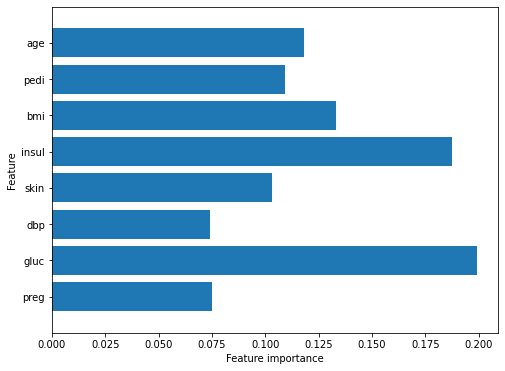

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("")
print('Random Forest')
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("")
print('Random Forest - Max Depth = 3')
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

print("")
print('Random Forest Feature Importance')
plot_feature_importances_diabetes(rf)


# import dump / load sklearn libs
from joblib import dump
from joblib import load
#import pickle

# save model to disk
filename = 'model.sav'
#pickle.
dump(rf, filename)

# load model from disk
rf = load(filename)
#pickle.load(filename)

# test pdpbox
import pdpbox
from pdpbox import pdp
pdp_pedi_insul = pdp.pdp_interact(rf,dataset[names],['insul','pedi'],features=target_feature,)
pdp.pdp_interact_plot(pdp_pedi_insul, ['insul','pedi'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#pdp.pdp_plot(pdp_diab,'insul')